![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [74]:
# Start your code here!
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
men = pd.read_csv('men_results.csv', index_col=0) 
women = pd.read_csv('women_results.csv', index_col=0)

In [75]:
men.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [76]:
women.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [77]:
men.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44353 non-null  object
 1   home_team   44353 non-null  object
 2   away_team   44353 non-null  object
 3   home_score  44353 non-null  int64 
 4   away_score  44353 non-null  int64 
 5   tournament  44353 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [78]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4884 non-null   object
 1   home_team   4884 non-null   object
 2   away_team   4884 non-null   object
 3   home_score  4884 non-null   int64 
 4   away_score  4884 non-null   int64 
 5   tournament  4884 non-null   object
dtypes: int64(2), object(4)
memory usage: 267.1+ KB


## Data Cleaning

In [79]:
#converting date column to datetime data type
men['date'] = pd.to_datetime(men['date'])
women['date'] = pd.to_datetime(women['date'])

### - Applying Filters

In [80]:
men_df = men[(men['date']>"2002-01-01") & (men['tournament'] == 'FIFA World Cup')]

In [81]:
women_df = women[(women['date']>"2002-01-01") & (women['tournament'] == 'FIFA World Cup')]

### - Create Total Goals column
- create new column to have total goals as an independent variable

In [85]:
men_df = men_df.copy()
women_df = women_df.copy()

In [86]:
men_df['total_goals'] = men_df['home_score'] + men_df['away_score']

In [87]:
women_df['total_goals'] = women_df['home_score'] + women_df['away_score']

In [88]:
# Create group and goals_scored columns
men_df["group"] = "men"
women_df["group"] = "women"

## Check Normality

### 1- Visualize the distribution

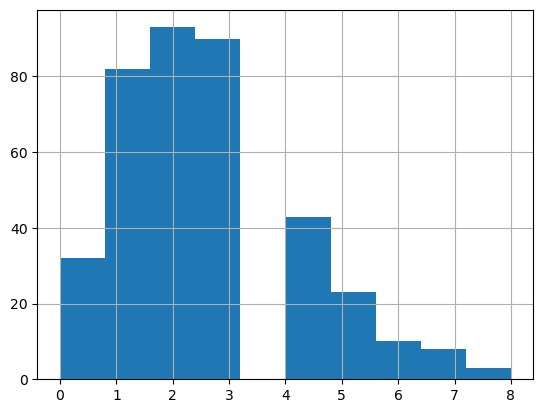

<Figure size 640x480 with 0 Axes>

In [12]:
men_df['total_goals'].hist()

plt.show();
plt.clf()


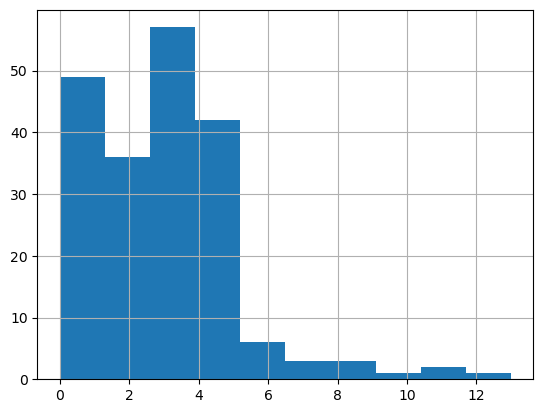

<Figure size 640x480 with 0 Axes>

In [13]:
women_df['total_goals'].hist()
plt.show()
plt.clf();

### 2- Q-Q plot

In [17]:
import statsmodels.api as sm

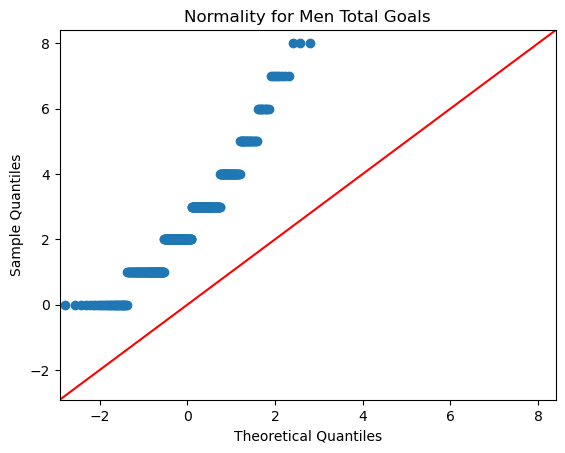

In [22]:
fig = sm.qqplot(men_df['total_goals'], line = '45')
plt.title('Normality for Men Total Goals')
plt.show()

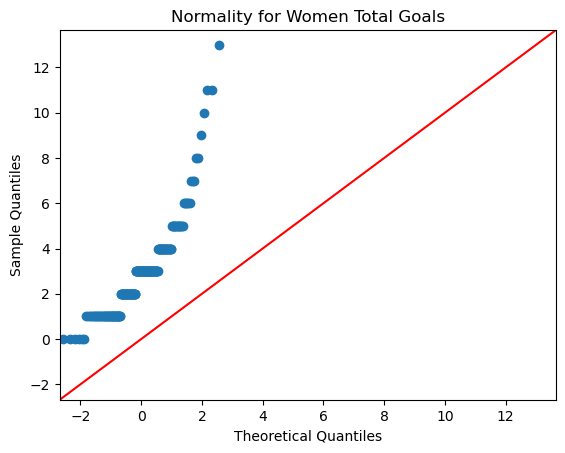

In [46]:
fig = sm.qqplot(women_df['total_goals'], line = '45')
plt.title('Normality for Women Total Goals')
plt.show()

- According to Q-Q plot, our data is not normally distributed

### 3- Shapiro test

In [24]:
from scipy import stats
shapiro_men = stats.shapiro(men_df['total_goals'])
shapiro_men

ShapiroResult(statistic=0.9266490340232849, pvalue=8.894397805075949e-13)

In [25]:
shapiro_women = stats.shapiro(women_df['total_goals'])
shapiro_women

ShapiroResult(statistic=0.8491019010543823, pvalue=3.8907912265281897e-13)

- According to shapiro test, P-Value is less that significance level 0.01 
- So we reject the Null Hyposthesis and data in not nromally distributed

### Choosing Correct Hypothesis Test

- We will select Mann–Whitney U test

In [89]:
#prepare the data
##join two data farmes
both = pd.concat([men_df, women_df], ignore_index= True)

In [90]:
# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["total_goals", "group"]]
both_subset.head()

,total_goals,group
0,1,men
1,8,men
2,2,men
3,3,men
4,1,men


In [91]:
#convert dataframe from long to wide
both_subset_wide = both_subset.pivot(columns="group", values="total_goals")
both_subset_wide.sample(5)

group,men,women
169,4.0,NaN
158,7.0,NaN
546,NaN,1.0
32,2.0,NaN
565,NaN,3.0


In [92]:
#import pingouin lib
import pingouin

In [93]:
# the statement follows the alternative hypothesis women have higer goal scores than men
pingouin.mwu(x= both_subset_wide['women'], y = both_subset_wide['men'], alternative='greater' )

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [94]:
result = pingouin.mwu(x= both_subset_wide['women'], y = both_subset_wide['men'], alternative='greater' )
p_val = result['p-val'][0]

In [42]:
p_val

0.005106609825443641

In [48]:
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

In [49]:
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}